# Analysis of flow cytometry data from heating plates

- This template analyzes RFP fluorescence using the Y610 channel
- Gating is optimized for E. coli
- 8 or 12 samples at different termperatures are the expected inputs


Import packages:

In [19]:
import cytoflow
from cytoflow import *
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import math
%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'
pwd = '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry'

### Define inputs:

In [ ]:
# experiment = 'AraC_WT'
# data_dir = '/mnt/c/JMA/Jan/publications/thermoLOV/raw_data/Replicates_AraC_wt'
reps= ['20241018_AraC_LOV_Ctrl_tubes_Cytometer', '20241030_AraC_LOV_Ctrl_tubes_Cytometer', '20241031_AraC_LOV_Ctrl_tubes_Cytometer']
temperatures = ['37', '41']
wells = ['E', 'F', 'G', 'H']
tech_reps = ['4', '5']
samples = ['No-AraC', 'AraC-wt', 'AraC-LOV', 'AraC-LOV-C450A']

In [2]:
# import data
op_0 = ImportOp(
    conditions={'CF_File': 'category'},
    tubes=[
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/01_sd2_AraC_WT_blue_light.fcs',
            conditions={'CF_File': '01_sd2_AraC_WT_blue_light'}),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/02_sd2_AraC_R2_blue_light.fcs',
            conditions={'CF_File': '02_sd2_AraC_R2_blue_light'}),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/03_sd2_AraC_S170_WT_LOV_1_blue_light.fcs',
            conditions={'CF_File': '03_sd2_AraC_S170_WT_LOV_1_blue_light'}),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/04_sd2_AraC_S170_R2_LOV_1_blue_light.fcs',
            conditions={'CF_File': '04_sd2_AraC_S170_R2_LOV_1_blue_light'}),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/05_AraC_S170_LOV_SwR1_R2_1_C3_blue_light.fcs',
            conditions={'CF_File':
                        '05_AraC_S170_LOV_SwR1_R2_1_C3_blue_light'}),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/06_AraC_S170_LOV_SwR2_R2_1_C3_blue_light.fcs',
            conditions={'CF_File':
                        '06_AraC_S170_LOV_SwR2_R2_1_C3_blue_light'}),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/07_sd2_AraC_WT_Arabinose_blue_light.fcs',
            conditions={'CF_File': '07_sd2_AraC_WT_Arabinose_blue_light'}),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/08_sd2_AraC_R2_Arabinose_blue_light.fcs',
            conditions={'CF_File': '08_sd2_AraC_R2_Arabinose_blue_light'}),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/09_sd2_AraC _S170_WT_LOV_1_Arabinose_blue_light.fcs',
            conditions={
                'CF_File': '09_sd2_AraC _S170_WT_LOV_1_Arabinose_blue_light'
            }),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/10_sd2_AraC_S170_R2_LOV_1_Arabinose_blue_light.fcs',
            conditions={
                'CF_File': '10_sd2_AraC_S170_R2_LOV_1_Arabinose_blue_light'
            }),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/11_AraC_S170_LOV_SwR1_R2_1_C3_Arabinose_blue_light.fcs',
            conditions={
                'CF_File': '11_AraC_S170_LOV_SwR1_R2_1_C3_Arabinose_blue_light'
            }),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/12_AraC_S170_LOV_SwR2_R2_1_C3_Arabinose_blue_light.fcs',
            conditions={
                'CF_File': '12_AraC_S170_LOV_SwR2_R2_1_C3_Arabinose_blue_light'
            }),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/13_sd2_AraC_WT_dark.fcs',
            conditions={'CF_File': '13_sd2_AraC_WT_dark'}),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/14_sd2_AraC_R2_dark.fcs',
            conditions={'CF_File': '14_sd2_AraC_R2_dark'}),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/15_sd2_AraC_S170_WT_LOV_1_dark.fcs',
            conditions={'CF_File': '15_sd2_AraC_S170_WT_LOV_1_dark'}),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/16_sd2_AraC_S170_R2_LOV_1_dark.fcs',
            conditions={'CF_File': '16_sd2_AraC_S170_R2_LOV_1_dark'}),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/17_AraC_S170_LOV_SwR1_R2_1_C3_dark.fcs',
            conditions={'CF_File': '17_AraC_S170_LOV_SwR1_R2_1_C3_dark'}),
        Tube( #/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/18_AraC_S170_LOV_SwR2_R2_1_C3_dark.fcs',
            conditions={'CF_File': '18_AraC_S170_LOV_SwR2_R2_1_C3_dark'}),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/19_sd2_AraC_WT_Arabinose_dark.fcs',
            conditions={'CF_File': '19_sd2_AraC_WT_Arabinose_dark'}),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/20_sd2_AraC_R2_Arabinose_dark.fcs',
            conditions={'CF_File': '20_sd2_AraC_R2_Arabinose_dark'}),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/21_sd2_AraC_S170_WT_LOV_1_Arabinose_dark.fcs',
            conditions={'CF_File':
                        '21_sd2_AraC_S170_WT_LOV_1_Arabinose_dark'}),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/22_sd2_AraC_S170_R2_LOV_1_Arabinose_dark.fcs',
            conditions={'CF_File':
                        '22_sd2_AraC_S170_R2_LOV_1_Arabinose_dark'}),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/23_AraC_S170_LOV_SwR1_R2_1_C3_Arabinose_dark.fcs',
            conditions={
                'CF_File': '23_AraC_S170_LOV_SwR1_R2_1_C3_Arabinose_dark'
            }),
        Tube(
            file=
            '/Volumes/ag-niopek/Niopek_Lab/8_Data/1_Nanopore/DMS_analysis/2024_PANCE_Nick/P_13_AraC_S170_LOV_R2_flow_cytometry/FACS files/24_AraC_S170_LOV_SwR2_R2_1_C3_Arabinose_dark.fcs',
            conditions={
                'CF_File': '24_AraC_S170_LOV_SwR2_R2_1_C3_Arabinose_dark'
            })
    ],
    channels={
        'FSC-A': 'FSC_A',
        'FSC-H': 'FSC_H',
        'SSC-A': 'SSC_A',
        'SSC-H': 'SSC_H',
        'Y610-A': 'Y610_A',
    })

ex_0 = op_0.apply()

### Check gating and adapt if necessary:

/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/cytoflow/utility/log_scale.py:117: RuntimeWarning: invalid value encountered in log10


(10, 100000)

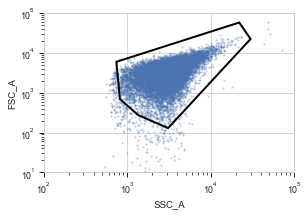

In [3]:
op_1 = PolygonOp(name='Ecoli',
                 xchannel='SSC_A',
                 ychannel='FSC_A',
                 vertices=[(1357.9732606179289, 275.05545196062917),
                           (3096.358586276033, 130.4833062471451),
                           (30016.169863090054, 22463.177752089905),
                           (21981.80211486695, 58220.89159406637),
                           (742.6137843756184, 6004.526015249525),
                           (818.5434737539503, 698.6374935564252)],
                 xscale='log',
                 yscale='log')

ex_1 = op_1.apply(ex_0)
op_1.default_view(subset=f'(CF_File == "10_sd2_AraC_S170_R2_LOV_1_Arabinose_blue_light") ').plot(ex_1)
plt.xlim([100, 100000])
plt.ylim([10, 100000])
# plt.savefig('HEK293T_gate.svg', bbox_inches='tight')

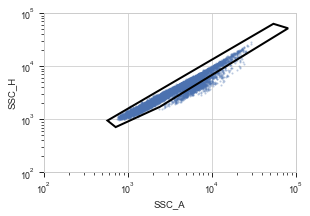

In [4]:
op_2 = PolygonOp(name='Singlets',
                 xchannel='SSC_A',
                 ychannel='SSC_H',
                 vertices=[(720.9528536391655, 715.2244917579866),
                           (2415.7462968326668, 1718.2013652044473),
                           (81537.30363552464, 51916.855303397606),
                           (54488.91914190919, 63080.21963700783),
                           (575.8161707505337, 949.4559941564318)],
                 xscale='log',
                 yscale='log')

ex_2 = op_2.apply(ex_1)
op_2.default_view(
    subset='(CF_File == "01_sd2_AraC_WT_blue_light") and (Ecoli == True)',
    huefacet='CF_File').plot(ex_1, xlim=(100.0, 100000), ylim=(100.0, 100000), legend=False)
# plt.savefig('singlet_gate.svg', bbox_inches='tight')

In [5]:
ex_2.data = ex_2.data[ex_2.data['Ecoli']==True]
ex_2.data = ex_2.data[ex_2.data['Singlets']==True]
ex_2.data = ex_2.data.groupby('CF_File').apply(lambda x: x.sample(15000)).reset_index(drop=True)

In [ ]:
# plt.hist(x=ex_2.data[ex_2.data['CF_File'] == '13_sd2_AraC_WT_dark'][['Y610_A']], bins=10000)
# plt.xlim(-1000,10000)

KeyboardInterrupt: 

: 

: 

In [6]:
stats = ex_2.data.groupby(['CF_File']).median().reset_index()
stats

,CF_File,FSC_A,FSC_H,SSC_A,SSC_H,Y610_A,Ecoli,Singlets
0,06_AraC_S170_LOV_SwR2_R2_1_C3_blue_light,3409.800049,5650.949951,3190.799927,3105.199951,432.899994,True,True
1,23_AraC_S170_LOV_SwR1_R2_1_C3_Arabinose_dark,6965.399902,9694.599609,3815.800049,3666.349976,639382.593750,True,True
2,21_sd2_AraC_S170_WT_LOV_1_Arabinose_dark,4676.850098,7081.300049,4729.800049,4459.949951,661.599976,True,True
3,02_sd2_AraC_R2_blue_light,5410.699951,7985.199951,4108.150146,3958.549927,555498.468750,True,True
4,24_AraC_S170_LOV_SwR2_R2_1_C3_Arabinose_dark,7337.700195,10168.000000,4245.449951,4043.649902,622872.000000,True,True
5,05_AraC_S170_LOV_SwR1_R2_1_C3_blue_light,3387.599976,5614.199951,3301.200073,3196.500000,250.050003,True,True
6,04_sd2_AraC_S170_R2_LOV_1_blue_light,3469.000000,5756.399902,3291.250000,3187.600098,17.750000,True,True
7,09_sd2_AraC _S170_WT_LOV_1_Arabinose_blue_light,3452.400024,5627.100098,3425.750000,3293.299927,58.799999,True,True
8,22_sd2_AraC_S170_R2_LOV_1_Arabinose_dark,6608.149902,9338.649902,3993.300049,3837.000000,509021.500000,True,True
9,13_sd2_AraC_WT_dark,3861.049927,6163.349854,3850.050049,3696.050049,10.000000,True,True


In [7]:
stats.loc[stats['CF_File'] == '13_sd2_AraC_WT_dark']['Y610_A']

9    10.0
Name: Y610_A, dtype: float64

### Plot histograms:

In [8]:
def FACS_hist(title, input_samples, label_names, colors, stats):
    # Set figure size for the notebook
    sns.set(style="white")
    sns.set(font_scale=1.5)
    sns.set_style('ticks')
    plt.rcParams["figure.figsize"]=5,5
    plt.rcParams["axes.linewidth"]=3
    plt.rcParams["xtick.major.width"]=3
    plt.rcParams["xtick.minor.width"]=3
    plt.rcParams["ytick.major.width"]=3   
    plt.xlabel('log[RFP]')
    #select data
    subset = ex_2.data[ex_2.data['CF_File'].isin(input_samples) ==True]
    subset['Y610_A'].replace(0, 0.001, inplace=True)
    subset['Y610_A'] = pd.to_numeric(subset['Y610_A'], errors='coerce')
    plt.gca().set_xlim((1, max(subset['Y610_A'])))


    # legend icons
    handles = [
        Patch(facecolor=color, label=label) 
        for label, color in zip(subset['CF_File'], colors)]
    # plot
    sns.kdeplot(data=subset, x='Y610_A', hue=subset['CF_File'].cat.remove_unused_categories(), 
                cut=0, fill=True, common_norm=False, alpha=.2, log_scale=True, palette=colors, 
                 linewidth = 3)

    # sns.kdeplot(data=subset, x='Y610_A', hue='CF_File', 
    #         cut=0, fill=True, common_norm=False, alpha=.2, log_scale=True, palette=colors, 
    #         linewidth=3)
    sns.despine()
    #plot.set(ylim=(left=1))
    
    # legend
    plt.legend(handles=handles, labels=label_names, frameon=False, loc='center', bbox_to_anchor=(1.3, 0.5))
    for input_sample in input_samples:
        print(stats[stats['CF_File'] == input_sample]['Y610_A'])  
        plt.axvline(x = stats[stats['CF_File'] == input_sample]['Y610_A'].iloc[0], color = 'black', label = stats[stats['CF_File'] == input_sample]['Y610_A'].iloc[0], linewidth=2)
    plt.ylim(0,1.75)
    plt.xlim(1,10000000)
    # plt.savefig(f'{pwd}/{title}.svg', bbox_inches='tight')
    plt.show()

/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/seaborn/_core.py:1060: RuntimeWarning: invalid value encountered in log10


9    10.0
Name: Y610_A, dtype: float64
16    628651.4375
Name: Y610_A, dtype: float64
23    311556.34375
Name: Y610_A, dtype: float64
17    704889.0625
Name: Y610_A, dtype: float64


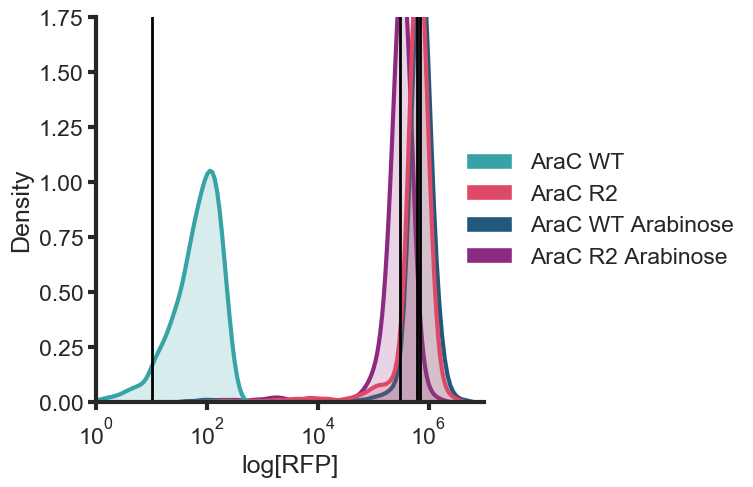

In [13]:
FACS_hist('Title-1', ['13_sd2_AraC_WT_dark', '14_sd2_AraC_R2_dark', '19_sd2_AraC_WT_Arabinose_dark', '20_sd2_AraC_R2_Arabinose_dark'], ['AraC WT', 'AraC R2', 'AraC WT Arabinose', 'AraC R2 Arabinose'], ['#38A3A6', '#DE4968', '#22587A',  '#8C2981'], stats)

/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/seaborn/_core.py:1060: RuntimeWarning: invalid value encountered in log10


21    12.7
Name: Y610_A, dtype: float64
15    12.5
Name: Y610_A, dtype: float64
6    17.75
Name: Y610_A, dtype: float64
13    63.900002
Name: Y610_A, dtype: float64


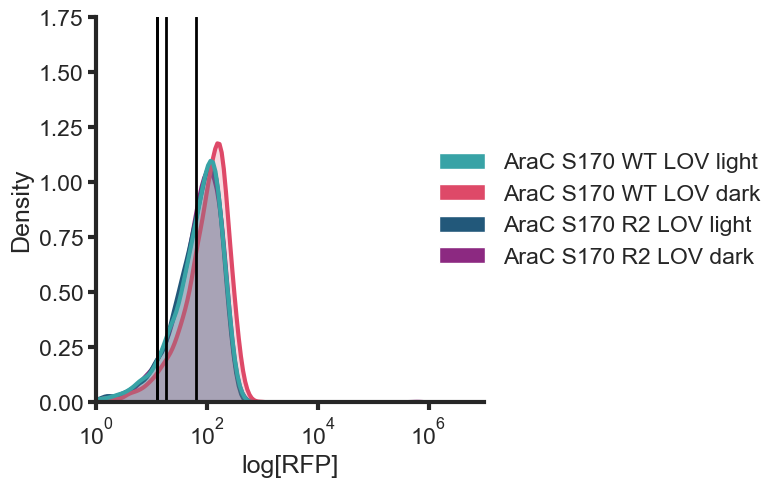

In [14]:
FACS_hist('-Ara', ['03_sd2_AraC_S170_WT_LOV_1_blue_light', '15_sd2_AraC_S170_WT_LOV_1_dark', '04_sd2_AraC_S170_R2_LOV_1_blue_light', '16_sd2_AraC_S170_R2_LOV_1_dark'], ['AraC S170 WT LOV light', 'AraC S170 WT LOV dark', 'AraC S170 R2 LOV light', 'AraC S170 R2 LOV dark'], ['#38A3A6', '#DE4968', '#22587A',  '#8C2981'], stats)

/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/seaborn/_core.py:1060: RuntimeWarning: invalid value encountered in log10


7    58.799999
Name: Y610_A, dtype: float64
2    661.599976
Name: Y610_A, dtype: float64
10    11982.300293
Name: Y610_A, dtype: float64
8    509021.5
Name: Y610_A, dtype: float64


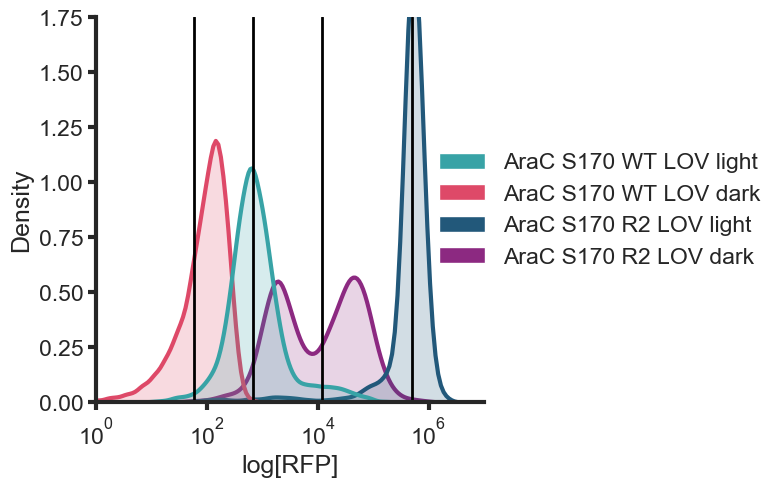

In [15]:
FACS_hist('-Ara', ['09_sd2_AraC _S170_WT_LOV_1_Arabinose_blue_light', '21_sd2_AraC_S170_WT_LOV_1_Arabinose_dark', '10_sd2_AraC_S170_R2_LOV_1_Arabinose_blue_light', '22_sd2_AraC_S170_R2_LOV_1_Arabinose_dark'], ['AraC S170 WT LOV light', 'AraC S170 WT LOV dark', 'AraC S170 R2 LOV light', 'AraC S170 R2 LOV dark'], ['#38A3A6', '#DE4968', '#22587A',  '#8C2981'], stats)

/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/seaborn/_core.py:1060: RuntimeWarning: invalid value encountered in log10


13    63.900002
Name: Y610_A, dtype: float64
6    17.75
Name: Y610_A, dtype: float64


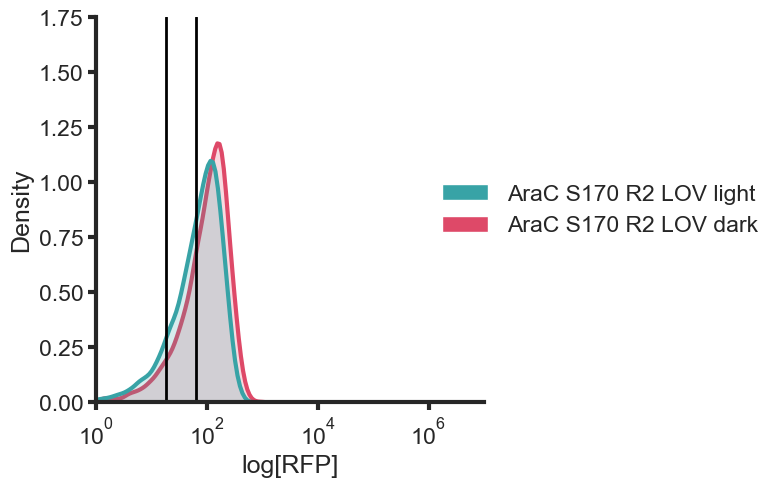

In [ ]:
# Fig 4 C arajin
FACS_hist('ctrl', ['16_sd2_AraC_S170_R2_LOV_1_dark', '04_sd2_AraC_S170_R2_LOV_1_blue_light'], ['AraC S170 R2 LOV light', 'AraC S170 R2 LOV dark'], ['#38A3A6', '#DE4968'], stats)

/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/seaborn/_core.py:1060: RuntimeWarning: invalid value encountered in log10


22    164585.25
Name: Y610_A, dtype: float64
5    250.050003
Name: Y610_A, dtype: float64


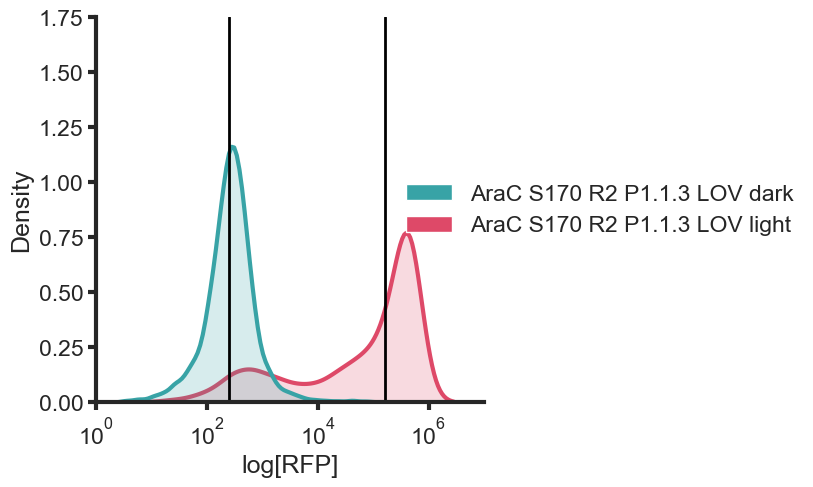

In [ ]:
#Fig 4 c erkrord
FACS_hist('SwR1', ['17_AraC_S170_LOV_SwR1_R2_1_C3_dark', '05_AraC_S170_LOV_SwR1_R2_1_C3_blue_light'], ['AraC S170 R2 P1.1.3 LOV dark', 'AraC S170 R2 P1.1.3 LOV light'], ['#38A3A6', '#DE4968'], stats)

/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/seaborn/_core.py:1060: RuntimeWarning: invalid value encountered in log10


11    567486.90625
Name: Y610_A, dtype: float64
0    432.899994
Name: Y610_A, dtype: float64


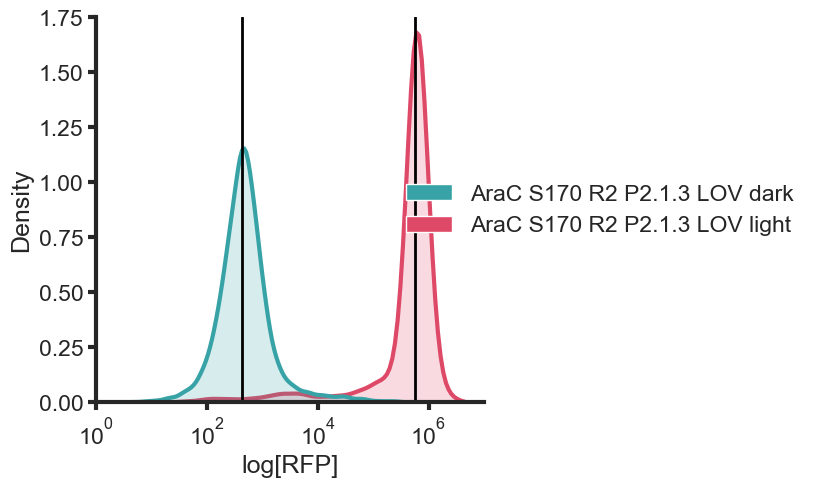

In [ ]:
# Fig 4 C verjin
FACS_hist('SwR2', ['18_AraC_S170_LOV_SwR2_R2_1_C3_dark', '06_AraC_S170_LOV_SwR2_R2_1_C3_blue_light'], ['AraC S170 R2 P2.1.3 LOV dark', 'AraC S170 R2 P2.1.3 LOV light'], ['#38A3A6', '#DE4968'], stats)

In [10]:
subset = ex_2.data[ex_2.data['CF_File'].isin([
    '13_sd2_AraC_WT_dark', '14_sd2_AraC_R2_dark', '19_sd2_AraC_WT_Arabinose_dark', '20_sd2_AraC_R2_Arabinose_dark'
])]
print(subset['Y610_A'].head(10))
print(subset['Y610_A'].dtype)

135000   -140.500000
135001      9.000000
135002   -119.699997
135003     41.000000
135004    146.600006
135005     15.600000
135006    281.200012
135007    -29.799999
135008     33.000000
135009     61.700001
Name: Y610_A, dtype: float64
float64


In [12]:
stats = dataset.groupby(['Sample', 'Rep', 'Well']).mean().reset_index()
stats['names'] = stats.apply(lambda x: f'{x[1]}-{x[2]}', axis=1)
dataset_piv = stats.pivot(index='Sample', columns='names', values='RFP')
dataset_piv = dataset_piv.reset_index()
dataset_piv = dataset_piv.rename(columns={f'0-{tech_reps[0]}':'Condition 1 rep 1', f'0-{tech_reps[1]}':'Condition 2 rep 1', f'1-{tech_reps[0]}':'Condition 1 rep 2', f'1-{tech_reps[1]}':'Condition 2 rep 2', f'2-{tech_reps[0]}':'Condition 1 rep 3', f'2-{tech_reps[1]}':'Condition 2 rep 3'})
dataset_piv = dataset_piv.iloc[::-1].reset_index()

NameError: name 'dataset' is not defined

In [11]:
plt.rcParams.update(plt.rcParamsDefault)
def bar_chart(data, ytitle, scale, title):
    # Extract the sample names
    samples = data['Sample']

    # Remove the 'Sample' column
    data = data.drop('Sample', axis=1)

    # get info for aspect ratio
    height = data.to_numpy().max()
    width = len(samples)

    # Get the number of samples and conditions
    num_samples = len(samples)
    num_conditions = len(data.columns) // 3

    # Calculate the mean for each condition and sample
    means = pd.DataFrame()
    for condition in range(1, num_conditions + 1):
        condition_cols = [f'Condition {condition} rep {i}' for i in range(1, 4)]
        condition_data = data[condition_cols]
        condition_mean = condition_data.mean(axis=1)
        means[f'Condition {condition}'] = condition_mean

    # Generate positions for bars on the x-axis
    bar_width = 0.2  # Width of each bar
    space_width = 0.2  # Space between all bars
    group_width = num_conditions * bar_width + space_width
    index = np.arange(num_samples)
    x_positions = index * group_width

    # Calculate the adjustment for each condition
    condition_offset = (num_conditions - 1) * bar_width / 8

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(width,5))
    for i, condition in enumerate(means.columns):
        if i == 0:
            color = 'dimgrey'
            label = '37°C'
            offset = -condition_offset
        else:
            color = '#e5383b'
            label='41°C'
            offset = condition_offset
        ax.bar(x_positions + offset + i * bar_width + space_width/7, means[condition], bar_width, label=label, color=color)

    # Add error bars and individual data points
    for i, condition in enumerate(means.columns):
        condition_cols = [f'Condition {i+1} rep {j+1}' for j in range(3)]
        condition_data = data[condition_cols]
        condition_mean = means[condition]
        condition_std = condition_data.std(axis=1)
        for j in range(num_samples):
            if i == 0:
                offset = -condition_offset
            else:
                offset = condition_offset
            x = x_positions[j] + offset + i * bar_width + space_width/7
            y = condition_mean[j]
            error = condition_std[j]
            ax.errorbar(x, y, yerr=error, fmt='none', color='black', capsize=4, zorder=5, linewidth=1, elinewidth=1)
            ax.scatter([x] * 3, condition_data.iloc[j], color='black', zorder=10, s=10)
    
    #fold change


    # Customize the plot
    ax.set_ylabel(ytitle)
    ax.set_title(title)
    ax.set_xticks(x_positions + offset + space_width/2)
    ax.set_xticklabels(samples)

    # Set the linewidth for axis lines and ticks
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.tick_params(axis='both', width=1)

    # Remove the upper and right parts of the frame
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Remove the frame around the legend
    ax.legend(frameon=False)

    # Add horizontal ticks to the error bars
    ax.yaxis.set_tick_params(which='both', direction='out', width=1)
    ax.xaxis.set_tick_params(which='both', direction='out', width=1, rotation=90)
    ax.set_yscale(scale)

    # Adjust the x-axis limits
    ax.set_xlim(x_positions[0] - condition_offset - space_width/2, x_positions[-1] + condition_offset + num_conditions * bar_width + space_width/2)


    # Display the plot
    plt.savefig(f'{title}_cytometer.svg')
    plt.show()

In [12]:
bar_chart(dataset_piv, 'RFP/OD600 (normalized)', 'linear', experiment)

NameError: name 'dataset_piv' is not defined

### Print fold changes

In [ ]:
fold_change = dataset.groupby(['Sample', 'Well']).mean().reset_index()
fold_change = fold_change.pivot(index='Sample', columns='Well', values='RFP')
print('Fold changes:')
fold_change[tech_reps[0]]/fold_change[tech_reps[1]]

Fold changes:


Sample
AraC-LOV          17.056633
AraC-LOV-C450A    14.220165
AraC-wt            0.950849
No-AraC            0.212539
dtype: float64